## Download dataset

In [68]:
!pip3 install opendatasets --quiet

In [69]:
import opendatasets as od

In [70]:
dataset='https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset'

In [71]:
od.download(dataset)

Skipping, found downloaded files in "./fake-and-real-news-dataset" (use force=True to force download)


In [72]:
import os
data_dir='fake-and-real-news-dataset/'

In [73]:

os.listdir(data_dir)

['True.csv', 'Fake.csv']

## Preprocessing the data

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
fake_df=pd.read_csv('fake-and-real-news-dataset/Fake.csv')
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [76]:

true_df=pd.read_csv('fake-and-real-news-dataset/True.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [77]:
true_df['category']=1
fake_df['category']=0

#### Concat the fake and real data

In [78]:
raw_df=pd.concat([true_df,fake_df],ignore_index=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


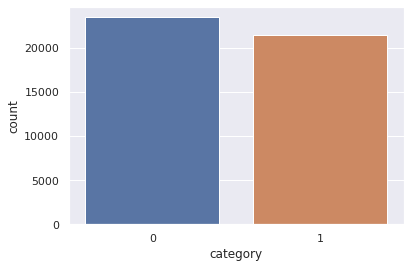

In [79]:
sns.set_style("darkgrid")
sns.countplot(raw_df.category)

In [80]:
raw_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [81]:
raw_df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [82]:
raw_df.title.count()

44898

In [83]:
raw_df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

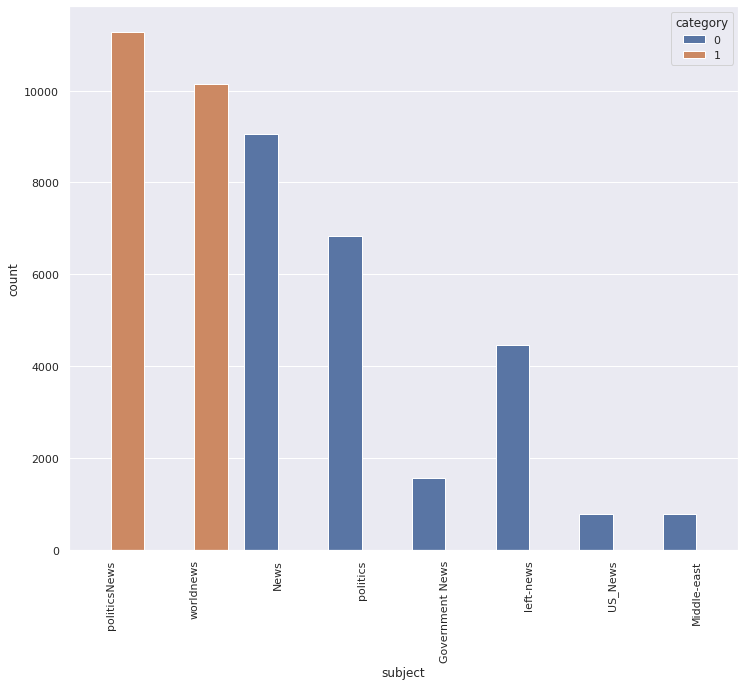

In [84]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
chart=sns.countplot(x="subject",hue="category",data=raw_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [85]:

raw_df["text"]=raw_df["text"] + " " +raw_df["title"]

In [86]:
del raw_df['title']
del raw_df['subject']
del raw_df['date']

In [87]:

raw_df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


## Data Cleaning

In [88]:
import nltk
from bs4 import BeautifulSoup
import re,string,unicodedata
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import STOPWORDS,WordCloud

In [89]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
stemmer=SnowballStemmer(language='english')
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
english_stopwords=stopwords.words('english')

In [94]:
vectorizer=TfidfVectorizer(
    lowercase=True,
    tokenizer=tokenize,
    stop_words=english_stopwords,
    max_features=1000
)

In [95]:
%%time
vectorizer.fit(raw_df.text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 4min 44s, sys: 855 ms, total: 4min 45s
Wall time: 4min 53s


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f9c65de9280>)

In [96]:
%%time
inputs=vectorizer.transform(raw_df.text)

CPU times: user 4min 38s, sys: 655 ms, total: 4min 38s
Wall time: 4min 39s


In [97]:
inputs.shape

(44898, 1000)

In [98]:
targets=raw_df.category.values

In [99]:
targets.shape

(44898,)

## Creating training and testing set

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(inputs,targets,shuffle=True,test_size=0.20,random_state=42)

In [102]:
train_inputs.shape , test_inputs.shape

((35918, 1000), (8980, 1000))

In [103]:
train_targets.shape ,test_targets.shape

((35918,), (8980,))

## Split train and validation set

In [104]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(train_inputs,train_targets,shuffle=True,random_state=42,test_size=.05)

In [105]:
train_inputs.shape ,val_inputs.shape

((34122, 1000), (1796, 1000))

In [106]:
train_targets.shape , val_targets.shape

((34122,), (1796,))

In [107]:
train_inputs

<34122x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3445946 stored elements in Compressed Sparse Row format>

## Converting Pytorch Tensors

In [108]:
import torch
from torch.utils.data import TensorDataset,dataloader
import torch.nn.functional as F

In [109]:
train_tensors=F.normalize(torch.tensor(train_inputs.toarray()).float(),dim=0)
val_tensors=F.normalize(torch.tensor(val_inputs.toarray()).float(),dim=0)

In [110]:
train_tensors.shape ,val_tensors.shape

(torch.Size([34122, 1000]), torch.Size([1796, 1000]))

In [111]:
train_ds=TensorDataset(train_tensors,torch.tensor(train_targets))
val_ds=TensorDataset((val_tensors),torch.tensor(val_targets))

In [112]:
batch_size=128


In [113]:
train_dl=dataloader.DataLoader(train_ds,batch_size,shuffle=True)
val_dl=dataloader.DataLoader(val_ds,batch_size)

In [114]:
for inputs_batch,targets_batch in train_dl:
  print('inputs.shape',inputs_batch.shape)
  print('targets.shape',targets_batch.shape)
  print(targets_batch)
  break 

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1])


## Logistic Regression Model

In [115]:
import torch.nn as nn

In [116]:
class LogReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1=nn.Linear(1000,1)

  def forward(self,xb):
    out=self.linear1(xb)
    return out

In [117]:
import numpy as np
from sklearn.metrics import accuracy_score,f1_score




In [118]:
logreg_model=LogReg()

In [119]:
for batch in val_dl:
  batch_inputs,batch_targets=batch
  print('input.shape',batch_inputs.shape)
  print('target.shape',batch_targets)

  batch_out=logreg_model(batch_inputs)
  probs=torch.sigmoid(batch_out[:,0])
  preds=(probs >= 0.5).int()

  print("outputs",preds)
  print("accuray_score",accuracy_score(batch_targets,preds))
  print("f1_score",f1_score(batch_targets,preds))
  break

input.shape torch.Size([128, 1000])
target.shape tensor([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1])
outputs tensor([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1], dtype=torch.int32)
accuray_score 0.4375
f1_score 0.43749999999999994


In [124]:
def evaluate(model,dl):
  losses,accs,f1s=[], [] , []
  for batch in dl:
    inputs,targets=batch
    out=model(inputs)

    probs=torch.sigmoid(out[:,0])
    loss=F.binary_cross_entropy(probs,targets.float(),weight=torch.tensor(20.))
    losses.append(loss.item())

    preds=(probs>0.5).int()
    acc=accuracy_score(targets,preds)
    f1=f1_score(targets,preds)

    accs.append(acc)
    f1s.append(f1)

  return np.mean(losses),np.mean(accs),np.mean(f1s)

In [130]:
def fit(epochs,lr,model,train_loader,val_loader):
  optimizer=torch.optim.Adam(model.parameters(),lr,weight_decay=1e-5)
  history=[]

  for epoch in range(epochs):

    #training phase
    for batch in train_loader:
      inputs,targets=batch
      out=model(inputs)
      probs=torch.sigmoid(out[:,0])
      loss=F.binary_cross_entropy(probs,targets.float(),
                                  weight=torch.tensor(20.))
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #Validation phase
    result=evaluate(model,val_loader)
    loss,acc,f1=result
    print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
        epoch,loss,acc,f1))
    
  return history    




In [126]:
logreg_model=LogReg()

In [127]:
history=[evaluate(logreg_model,val_dl)]

In [128]:
history

[(13.854203542073568, 0.5375, 0.3750928523397622)]

In [131]:
%%time 
history += fit(5,0.02,logreg_model,train_dl,val_dl)

Epoch: 0; Loss: 3.2659; Accuracy: 0.9417; F1 Score: 0.9388
Epoch: 1; Loss: 3.0090; Accuracy: 0.9510; F1 Score: 0.9483
Epoch: 2; Loss: 3.6300; Accuracy: 0.9594; F1 Score: 0.9573
Epoch: 3; Loss: 3.4077; Accuracy: 0.9646; F1 Score: 0.9629
Epoch: 4; Loss: 3.2291; Accuracy: 0.9708; F1 Score: 0.9693
CPU times: user 2.05 s, sys: 493 ms, total: 2.55 s
Wall time: 2.66 s


In [132]:
%%time 
history += fit(10,0.01,logreg_model,train_dl,val_dl)

Epoch: 0; Loss: 3.1539; Accuracy: 0.9729; F1 Score: 0.9715
Epoch: 1; Loss: 3.0369; Accuracy: 0.9760; F1 Score: 0.9747
Epoch: 2; Loss: 2.9176; Accuracy: 0.9766; F1 Score: 0.9752
Epoch: 3; Loss: 3.7350; Accuracy: 0.9781; F1 Score: 0.9768
Epoch: 4; Loss: 2.7679; Accuracy: 0.9786; F1 Score: 0.9774
Epoch: 5; Loss: 3.6043; Accuracy: 0.9797; F1 Score: 0.9785
Epoch: 6; Loss: 3.5624; Accuracy: 0.9812; F1 Score: 0.9802
Epoch: 7; Loss: 2.5868; Accuracy: 0.9849; F1 Score: 0.9839
Epoch: 8; Loss: 2.5510; Accuracy: 0.9854; F1 Score: 0.9844
Epoch: 9; Loss: 2.5323; Accuracy: 0.9854; F1 Score: 0.9844
CPU times: user 4.33 s, sys: 14 ms, total: 4.34 s
Wall time: 4.38 s


In [137]:
losses=[item[0] for item in history]